# SQL - Cumulative Lab

## Introduction

In this lesson, we'll run through some practice questions to reinforce your knowledge of SQL queries.

## Objectives

You will be able to:

- Practice interpreting "word problems" and translating them into SQL queries
- Practice deciding and performing whichever type of `JOIN` is best for retrieving desired data
- Practice using `GROUP BY` statements in SQL to apply aggregate functions like `COUNT`, `MAX`, `MIN`, and `SUM`
- Practice using the `HAVING` clause to compare different aggregates
- Practice writing subqueries to decompose complex queries

## Your Task: Querying a Customer Database

![shelves filled with colorful model cars](images/model_cars.jpg)

Photo by <a href="https://unsplash.com/@bright?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Karen Vardazaryan</a> on <a href="/s/photos/model-car?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Your employer makes miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material.

### Data Understanding

You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

<img src='images/Database-Schema.png'>

The queries you are asked to write will become more complex over the course of the lab.

## Getting Started

As in previous labs, we'll make use of the `sqlite3` library as well as `pandas`. By combining them, we'll be able to write queries as Python strings, then display the results in a conveniently-formatted table.

***Note:*** Throughout this lesson, the only thing you will need to change is the content of the strings containing SQL queries. You do NOT need to modify any of the code relating to `pandas`; this is just to help make the output more readable.

In the cell below, we:

* Import the necessary libraries, `pandas` and `sqlite3`
* Establish a connection to the database `data.sqlite`, called `conn`

In [1]:
# Run this cell without changes
import sqlite3
import pandas as pd

conn = sqlite3.Connection("data.sqlite")

The basic structure of a query in this lab is:

* Write the SQL query inside of the Python string
* Use `pd.read_sql` to display the results of the query in a formatted table

For example, if we wanted to select a list of all product lines from the company, that would look like this:

In [2]:
# Run this cell without changes
q0 = """
SELECT productline
FROM productlines
;
"""

pd.read_sql(q0, conn)

,productLine
0,Classic Cars
1,Motorcycles
2,Planes
3,Ships
4,Trains
5,Trucks and Buses
6,Vintage Cars


From now on, you will replace `None` within these Python strings with the actual SQL query code.

## Part 1: Basic Queries

First, let's review some basic SQL queries, which do not require any joining, aggregation, or subqueries.

### Query 1: Customers with Credit Over 25,000 in California
Write a query that gets the contact first name, contact last name, phone number, address line 1, and credit limit for all customers in California with a credit limit greater than 25000.00.

(California means that the `state` value is `'CA'`.)

#### Expected Output

<img src='images/expected_output_q1.png'>

In [5]:
# Replace None with appropriate SQL code
q1 = """
Select contactFirstName, contactLastName, phone, addressLine1, creditLimit
from customers
where state = 'CA'
and creditLimit > 25000
;
"""

q1_result = pd.read_sql(q1, conn)
q1_result

,contactFirstName,contactLastName,phone,addressLine1,creditLimit
0,Susan,Nelson,4155551450,5677 Strong St.,210500
1,Julie,Murphy,6505555787,5557 North Pendale Street,64600
2,Juri,Hashimoto,6505556809,9408 Furth Circle,84600
3,Julie,Young,6265557265,78934 Hillside Dr.,90700
4,Valarie,Thompson,7605558146,361 Furth Circle,105000
5,Julie,Brown,6505551386,7734 Strong St.,105000
6,Brian,Chandler,2155554369,6047 Douglas Av.,57700
7,Sue,Frick,4085553659,3086 Ingle Ln.,77600
8,Steve,Thompson,3105553722,3675 Furth Circle,55400
9,Sue,Taylor,4155554312,2793 Furth Circle,60300


The following code checks that your result is correct:

In [6]:
# Run this cell without changes

# Testing which columns are returned
assert list(q1_result.columns) == ['contactFirstName', 'contactLastName', 'phone', 'addressLine1', 'creditLimit']

# Testing how many rows are returned
assert len(q1_result) == 10

# Testing the values in the first result
assert list(q1_result.iloc[0]) == ['Susan', 'Nelson', '4155551450', '5677 Strong St.', 210500]

### Query 2: Customers Outside of the USA with "Collect" in Their Name

Write a query that gets the customer name, state, and country, for all customers outside of the USA with `"Collect"` as part of their customer name.

We are looking for customers with names like `"Australian Collectors, Co."` or `"BG&E Collectables"`, where `country` is not `"USA"`.

#### Expected Output

<img src='images/expected_output_q2.png'>

In [13]:
# Replace None with appropriate SQL code
q2 = """
select customerName, state, country
from customers
where customerName like "%Collect%"
and country != "USA"
;
"""

q2_result = pd.read_sql(q2, conn)
q2_result

,customerName,state,country
0,"Australian Collectors, Co.",Victoria,Australia
1,"Clover Collections, Co.",None,Ireland
2,"UK Collectables, Ltd.",None,UK
3,"King Kong Collectables, Co.",None,Hong Kong
4,Heintze Collectables,None,Denmark
5,"Royal Canadian Collectables, Ltd.",BC,Canada
6,BG&E Collectables,None,Switzerland
7,Reims Collectables,None,France
8,Precious Collectables,None,Switzerland
9,Salzburg Collectables,None,Austria


The following code checks that your result is correct:

In [14]:
# Run this cell without changes

# Testing which columns are returned
assert list(q2_result.columns) == ['customerName', 'state', 'country']

# Testing how many rows are returned
assert len(q2_result) == 15

# Testing the values in the first result

assert list(q2_result.iloc[0]) == ['Australian Collectors, Co.', 'Victoria', 'Australia']

### Query 3: Customers without Null States

Write a query that gets the full address (line 1, line 2, city, state, postal code, country) for all customers where the `state` field is not null.

Here we'll only display the first 10 results.

#### Expected Output

<img src='images/expected_output_q3.png'>

In [19]:
# Replace None with appropriate SQL code
q3 = """
Select addressLine1, addressLine2, city, state, postalCode, country
from customers
where state != "null"
;
"""

q3_result = pd.read_sql(q3, conn)
q3_result.head(10)

,addressLine1,addressLine2,city,state,postalCode,country
0,8489 Strong St.,,Las Vegas,NV,83030,USA
1,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia
2,5677 Strong St.,,San Rafael,CA,97562,USA
3,5557 North Pendale Street,,San Francisco,CA,94217,USA
4,897 Long Airport Avenue,,NYC,NY,10022,USA
5,4092 Furth Circle,Suite 400,NYC,NY,10022,USA
6,7586 Pompton St.,,Allentown,PA,70267,USA
7,9408 Furth Circle,,Burlingame,CA,94217,USA
8,149 Spinnaker Dr.,Suite 101,New Haven,CT,97823,USA
9,4658 Baden Av.,,Cambridge,MA,51247,USA


The following code checks that your result is correct:

In [20]:
# Run this cell without changes

# Testing which columns are returned
assert list(q3_result.columns) == ['addressLine1', 'addressLine2', 'city', 'state', 'postalCode', 'country']

# Testing how many rows are returned
assert len(q3_result) == 49

# Testing the values in the first result
assert list(q3_result.iloc[0]) == ['8489 Strong St.', '', 'Las Vegas', 'NV', '83030', 'USA']

You have now completed all of the basic queries!

## Part 2: Aggregate and Join Queries

### Query 4: Average Credit Limit by State in USA

Write a query that gets the average credit limit per state in the USA.

The two fields selected should be `state` and `average_credit_limit`, which is the average of the `creditLimit` field for that state.

#### Expected Output

<img src='images/expected_output_q4.png'>

In [23]:
# Replace None with appropriate SQL code
q4 = """
select state, avg(creditLimit) as average_credit_limit

from customers
where country = "USA"
group by state

;
"""

q4_result = pd.read_sql(q4, conn)
q4_result

,state,average_credit_limit
0,CA,83854.545455
1,CT,57350.000000
2,MA,70755.555556
3,NH,114200.000000
4,NJ,43000.000000
5,NV,71800.000000
6,NY,89966.666667
7,PA,84766.666667


The following code checks that your result is correct:

In [24]:
# Run this cell without changes

# Testing which columns are returned
assert list(q4_result.columns) == ['state', 'average_credit_limit']

# Testing how many rows are returned
assert len(q4_result) == 8

# Testing the values in the first result
first_result_list = list(q4_result.iloc[0])
assert first_result_list[0] == 'CA' 
assert round(first_result_list[1], 3) == round(83854.54545454546, 3)

### Query 5: Joining Customers and Orders

Write a query that uses `JOIN` statements to get the customer name, order number, and status for all orders. Refer to the ERD above to understand which tables contain these pieces of information, and the relationship between these tables.

We will only display the first 15 results.

#### Expected Output

<img src='images/expected_output_q5.png'>

In [30]:
# Replace None with appropriate SQL code
q5 = """
select customers.customerName, orders.orderNumber, orders.status

from customers

inner join orders on cs.customerNumber = customers.customerNumber

;
"""
q5_result = pd.read_sql(q5, conn)
q5_result.head(15)

,customerName,orderNumber,status
0,Atelier graphique,10123,Shipped
1,Atelier graphique,10298,Shipped
2,Atelier graphique,10345,Shipped
3,Signal Gift Stores,10124,Shipped
4,Signal Gift Stores,10278,Shipped
5,Signal Gift Stores,10346,Shipped
6,"Australian Collectors, Co.",10120,Shipped
7,"Australian Collectors, Co.",10125,Shipped
8,"Australian Collectors, Co.",10223,Shipped
9,"Australian Collectors, Co.",10342,Shipped


The following code checks that your result is correct:

In [31]:
# Run this cell without changes

# Testing which columns are returned
assert list(q5_result.columns) == ['customerName', 'orderNumber', 'status']

# Testing how many rows are returned
assert len(q5_result) == 326

# Testing the values in the first result
assert list(q5_result.iloc[0]) == ['Atelier graphique', 10123, 'Shipped']


### Query 6: Total Payments

Write a query that uses `JOIN` statements to get top 10 customers in terms of total payment amount. Find the customer name, customer number, and sum of all payments made. The results should be ordered by the sum of payments made, starting from the highest value.

The three columns selected should be `customerName`, `customerNumber` and `total_payment_amount`.

#### Expected Output

<img src='images/expected_output_q6.png'>

In [35]:
# Replace None with appropriate SQL code
q6 = """
select customers.customerName, customers.customerNumber, sum(amount) as total_payment_amount

from customers

inner join payments on customers.customerNumber = payments.customerNumber

group by customerName 

order by total_payment_amount desc
limit 10
;
"""
q6_result = pd.read_sql(q6, conn)
q6_result

,customerName,customerNumber,total_payment_amount
0,Euro+ Shopping Channel,141,715738.98
1,Mini Gifts Distributors Ltd.,124,584188.24
2,"Australian Collectors, Co.",114,180585.07
3,Muscle Machine Inc,151,177913.95
4,"Dragon Souveniers, Ltd.",148,156251.03
5,"Down Under Souveniers, Inc",323,154622.08
6,"AV Stores, Co.",187,148410.09
7,"Anna's Decorations, Ltd",276,137034.22
8,Corporate Gift Ideas Co.,321,132340.78
9,"Saveley & Henriot, Co.",146,130305.35


The following code checks that your result is correct:

In [36]:
# Run this cell without changes

# Testing which columns are returned
assert list(q6_result.columns) == ['customerName', 'customerNumber', 'total_payment_amount']

# Testing how many rows are returned
assert len(q6_result) == 10

# Testing the values in the first result
assert list(q6_result.iloc[0]) == ['Euro+ Shopping Channel', 141, 715738.98]

### Query 7: Products that Have Been Purchased 10 or More Times



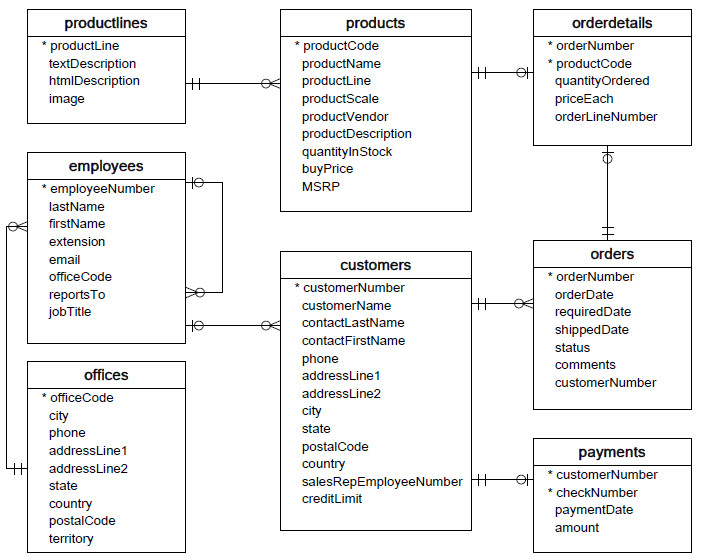

Write a query that, for each customer, finds all of the products that they have purchased 10 or more times cumulatively. For each record, return  the customer name, customer number, product name, product code, and total number ordered. Sort the rows in ascending order by the quantity ordered.

The five columns selected should be `customerName`, `customerNumber`, `productName`, `productCode`, and `total_ordered`, where `total_ordered` is the sum of all quantities of that product ordered by that customer.

**_Hint_**: For this one, you'll need to make use of `HAVING`, `GROUP BY`, and `ORDER BY` — make sure you get the order of them correct!

#### Expected Output

<img src='images/expected_output_q7.png'>

In [63]:
# Replace None with approprite SQL code
q7 = """
SELECT
    c.customerName,
    c.customerNumber,
    p.productName,
    p.productCode,
    SUM(od.quantityOrdered) AS total_ordered
FROM
    customers c
        JOIN orders o
            ON c.customerNumber = o.customerNumber
        JOIN orderdetails od
            ON od.orderNumber = o.orderNumber
        JOIN products p
            ON p.productCode = od.productCode
GROUP BY c.customerNumber, od.productCode
HAVING SUM(od.quantityOrdered) >= 10
ORDER BY total_ordered
;
"""
q7_result = pd.read_sql(q7, conn)
q7_result

,customerName,customerNumber,productName,productCode,total_ordered
0,Petit Auto,314,1913 Ford Model T Speedster,S18_2949,10
1,"Extreme Desk Decorations, Ltd",412,1961 Chevrolet Impala,S24_4620,10
2,La Rochelle Gifts,119,1954 Greyhound Scenicruiser,S32_2509,11
3,Tekni Collectables Inc.,328,American Airlines: B767-300,S700_1691,11
4,The Sharp Gifts Warehouse,450,1969 Chevrolet Camaro Z28,S24_3191,13
...,...,...,...,...,...
2526,Euro+ Shopping Channel,141,2002 Chevy Corvette,S24_3432,174
2527,Euro+ Shopping Channel,141,1957 Chevy Pickup,S12_4473,183
2528,Euro+ Shopping Channel,141,1970 Dodge Coronet,S24_1444,197
2529,Euro+ Shopping Channel,141,1958 Chevy Corvette Limited Edition,S24_2840,245


The following code checks that your result is correct:

In [64]:
# Run this cell without changes

# Testing which columns are returned
assert list(q7_result.columns) == ['customerName', 'customerNumber', 'productName', 'productCode', 'total_ordered']

# Testing how many rows are returned
assert len(q7_result) == 2531

# Testing the values in the first result
assert list(q7_result.iloc[0]) == ['Petit Auto', 314, '1913 Ford Model T Speedster', 'S18_2949', 10]

### Query 8: Employees in Offices with Fewer than Five Employees

Finally, get the last name, first name, employee number, and office code for employees from offices with fewer than 5 employees.

***Hint:*** Use a subquery to find the relevant offices.

#### Expected Output

<img src='images/expected_output_q8.png'>

In [70]:
# Replace None with approprite SQL code
q8 = """
SELECT
    lastName,firstName,employeeNumber,officeCode
FROM
    employees
Where officeCode in
    (SELECT count(officeCode) as office_count
    Where office_count < 5)
    

;
"""
q8_result = pd.read_sql(q8, conn)
q8_result

DatabaseError: Execution failed on sql '
SELECT
    lastName,firstName,employeeNumber,officeCode
FROM
    employees
Where officeCode in
    (SELECT count(officeCode) as office_count
    Where office_count < 5)
    

;
': misuse of aggregate: count()

The following code checks that your result is correct:

In [ ]:
# Run this cell without changes

# Testing which columns are returned
assert list(q8_result.columns) == ['lastName', 'firstName', 'employeeNumber', 'officeCode']

# Testing how many rows are returned
assert len(q8_result) == 12

# Testing the values in the first result
assert list(q8_result.iloc[0]) == ['Patterson', 'William', 1088, 6]

Now that we are finished writing queries, close the connection to the database:

In [ ]:
# Run this cell without changes
conn.close()

## Summary

In this lesson, we produced several data queries for a model car company, mainly focused around its customer data. Along the way, we reviewed many of the major concepts and keywords associated with SQL `SELECT` queries: `FROM`, `WHERE`, `GROUP BY`, `HAVING`, `ORDER BY`, `JOIN`, `SUM`, `COUNT`, and `AVG`.